In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# Nivell 1
#### Exercici 1
Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [2]:
tips=pd.read_csv('Desktop/DataScience/datasets/tips/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Tenemos 244 filas y 7 columnas
tips.shape

(244, 7)

In [4]:
# tips es un dataframe, tiene dimensión 2
tips.ndim

2

In [5]:
#El nombre de las columnas
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
# 5 variables numéricas: 2 float(total_bill y tip) y una integer(size)
# 3 variables categóricas (sex, smoker,day y time)
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
#Calculamos el porcentaje que representa la propina respecto al precio del servicio
#  total bill= tip +precio servicio
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


In [8]:
tips.groupby('day')['tip_pct'].mean()

day
Fri     20.860000
Sat     18.530690
Sun     22.571579
Thur    19.481935
Name: tip_pct, dtype: float64

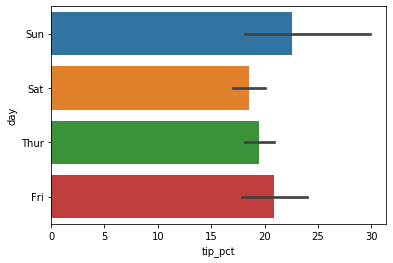

In [9]:
# Media de los porcentajes por día
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

Vemos que de media los mejores días son el viernes y el domingo, curiosamente el peor día es el sábado. Las "error bars" indican el intervalo de confianza al 95%.

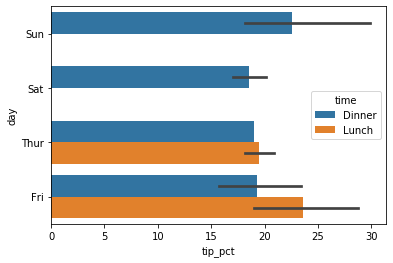

In [10]:
#Añadimos otra variable categórica al gráfico.
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

El gráfico nos indica que no se sirven comidas durante el fin de semana. El jueves y el viernes las propinas para comer son superiores a las cenas.

In [11]:
tips.groupby(['day','time']).mean()

total_bill       tip      size    tip_pct
day  time                                             
Fri  Dinner   19.663333  2.940000  2.166667  19.256667
     Lunch    12.845714  2.382857  2.000000  23.608571
Sat  Dinner   20.441379  2.993103  2.517241  18.530690
Sun  Dinner   21.410000  3.255132  2.842105  22.571579
Thur Dinner   18.780000  3.000000  2.000000  19.010000
     Lunch    17.664754  2.767705  2.459016  19.489672

In [12]:
#solo variables numéricas
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [13]:
# Añadimos variables categóricas que muestran la moda y la cantidad
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [14]:
#% de nulos, no hay en este dataset
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [15]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [16]:
round(tips['tip'].median(),3)

2.9

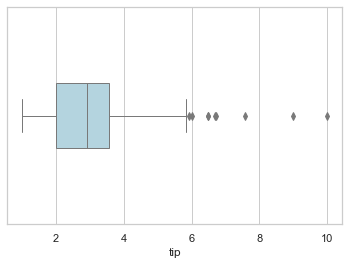

In [17]:
#Boxplot de la variable tip
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips['tip'], color='lightblue', fliersize=5, linewidth=1, width=0.3)

Vemos que hay varios outliers a la derecha de la caja, Q1=2, la mediana Q2=3 y Q3=3.5.

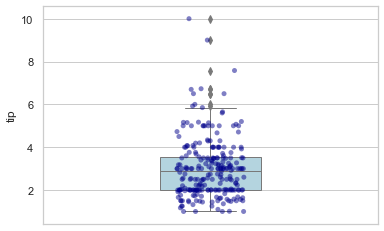

In [18]:
#Combinamos dos visualizaciones diferentes en un solo plot.
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

Stripplot es un tipo de gráfico que nos muestra los puntos de la variable, en este caso tip. Vemos como coinciden 
los outliers y como se distribuyen los datos en los diferentes cuartiles

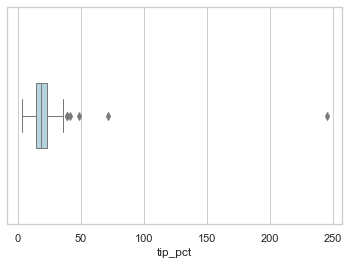

In [19]:
#boxplot de tip_pct
sns.boxplot(x="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5, linewidth=1 , width=0.3);

El boxplot de porcentaje de las propinas, para propinas menores a 10$, no tiene tanta variabilidad y es más reducido. Como curiosidad alguien quedó muy satisfecho y dejó muy buena propina respecto al precio original!!! Claro que como mucho fueron 10 dólares.

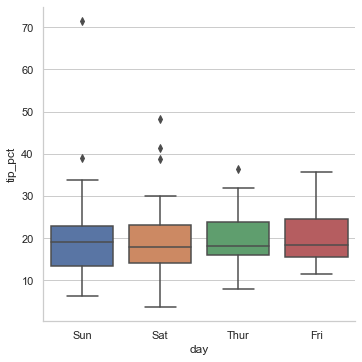

In [20]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

El filtrar tip_pct por porcentajes inferiores a 245 nos elimina el outlier que comentamos anteriormente y permite una mejor visualización de los datos y que no nos desvirtue el bloxplot, seguramente ese dato será un error.
Los boxplot por días son bastante uniformes, los IQR de los 4 días tienen valores muy parecidos.

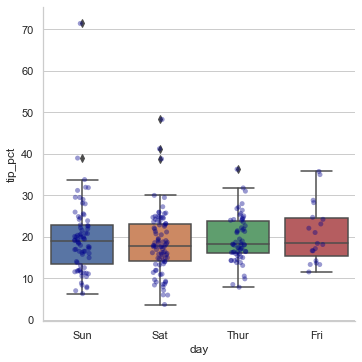

In [21]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Idéntica a la gráfica anterior solo añadiendo stripplot para ver la distribución de puntos

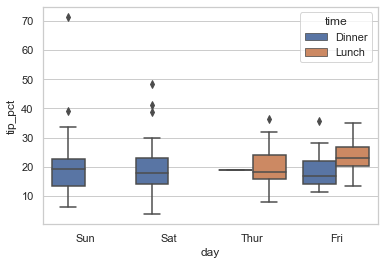

In [22]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

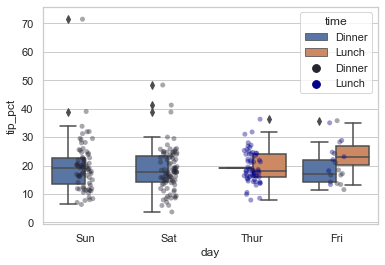

In [23]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Repetición del proceso anterior pero clasificando también por cena o comida

## Facet Grids y Categorical DataFrame

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método **factorplot( )** de "Facet Grid" :

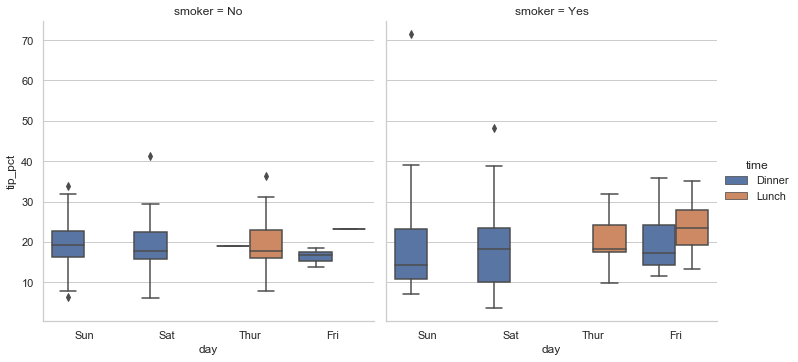

In [24]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

# Nivell 2
#### Exercici2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [25]:
with open('Desktop/DataScience/datasets/movies/movies.dat', 'r') as fp:
    data = fp.read().splitlines()

In [26]:
df=pd.DataFrame(data)
df.head()

,0
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy


In [27]:
df1=df.iloc[:,0].str.extract(r'((?P<Index>\d*)::(?P<Title>.*)(?P<Year>\(\d{4}\))::(?P<Genre>[\w|\'-]*$))')
movies=df1.loc[:,['Title','Year','Genre']]
movies['Year']=movies['Year'].str.lstrip('(').str.rstrip(')')
movies.head()

,Title,Year,Genre
0,Toy Story,1995,Animation|Children's|Comedy
1,Jumanji,1995,Adventure|Children's|Fantasy
2,Grumpier Old Men,1995,Comedy|Romance
3,Waiting to Exhale,1995,Comedy|Drama
4,Father of the Bride Part II,1995,Comedy


In [28]:
lista=[y for x in movies.Genre.values.flatten() for y in  re.split('[|]', x)]
lista=[*set(lista)]
lista[0:5]

['Animation', 'Romance', 'Western', 'Comedy', 'Documentary']

In [29]:
for i in lista:
    movies[i]=movies['Genre'].apply(lambda x: 1 if i in x else 0)

In [30]:
movies.head()

,Title,Year,Genre,Animation,Romance,Western,Comedy,Documentary,Drama,Crime,...,Film-Noir,Action,Thriller,Horror,Sci-Fi,Musical,Children's,War,Adventure,Fantasy
0,Toy Story,1995,Animation|Children's|Comedy,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Jumanji,1995,Adventure|Children's|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,Grumpier Old Men,1995,Comedy|Romance,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,Comedy|Drama,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
movies.drop('Genre','columns', inplace=True)
movies.head()

,Title,Year,Animation,Romance,Western,Comedy,Documentary,Drama,Crime,Mystery,Film-Noir,Action,Thriller,Horror,Sci-Fi,Musical,Children's,War,Adventure,Fantasy
0,Toy Story,1995,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Jumanji,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,Grumpier Old Men,1995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
movies.shape

(3883, 20)

In [33]:
movies.ndim

2

In [34]:
movies.columns

Index(['Title', 'Year', 'Animation', 'Romance', 'Western', 'Comedy',
       'Documentary', 'Drama', 'Crime', 'Mystery', 'Film-Noir', 'Action',
       'Thriller', 'Horror', 'Sci-Fi', 'Musical', 'Children's', 'War',
       'Adventure', 'Fantasy'],
      dtype='object')

In [35]:
movies.dtypes

Title          object
Year           object
Animation       int64
Romance         int64
Western         int64
Comedy          int64
Documentary     int64
Drama           int64
Crime           int64
Mystery         int64
Film-Noir       int64
Action          int64
Thriller        int64
Horror          int64
Sci-Fi          int64
Musical         int64
Children's      int64
War             int64
Adventure       int64
Fantasy         int64
dtype: object

In [36]:
movies.Year=movies.Year.astype('int64')
movies.Year.dtypes

dtype('int64')

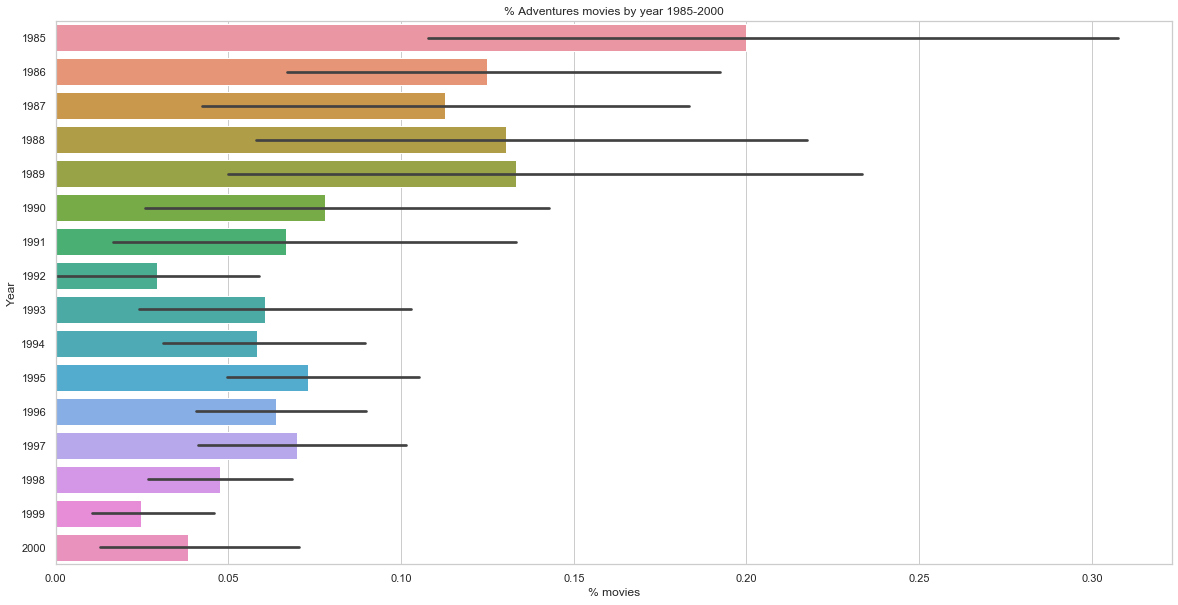

In [37]:
plt.figure(figsize=(20,10))
movies2=movies[movies['Year']>=1985]
sns.barplot(x='Adventure', y='Year', data=movies2,orient="h")
plt.xlabel('% movies')
plt.title('% Adventures movies by year 1985-2000')
plt.show()

In [38]:
movies2.groupby('Year')['Adventure'].mean()

Year
1985    0.200000
1986    0.125000
1987    0.112676
1988    0.130435
1989    0.133333
1990    0.077922
1991    0.066667
1992    0.029412
1993    0.060606
1994    0.058366
1995    0.073099
1996    0.063768
1997    0.069841
1998    0.047478
1999    0.024735
2000    0.038462
Name: Adventure, dtype: float64

Vemos que las películas de aventuras desde 1985 hasta 2000 han descendido en porcentaje

Las barras de errores son los intervalos de confianza al 95%, en este caso significa que la media poblacional estaría entre sus extremos.

**Vamos a comprobarlo!!!** para movies de aventuras y año 1985

In [39]:
from scipy.stats import norm
year=1985
x=movies.loc[movies['Year']==year,'Adventure'].mean()  #media
s=movies.loc[movies['Year']==year,'Adventure'].std()   #desviacion
n=movies.loc[movies['Year']==year,'Adventure'].count() #n elementos
error=s/np.sqrt(n)                                     #error
z_value=norm.ppf(1-0.025)                              #z-value para 95%, es doble cola tenemos alfa=0.025
c=error*z_value
print('El intervalo es',round(x-c,4),round(x+c,4))

El intervalo es 0.102 0.298


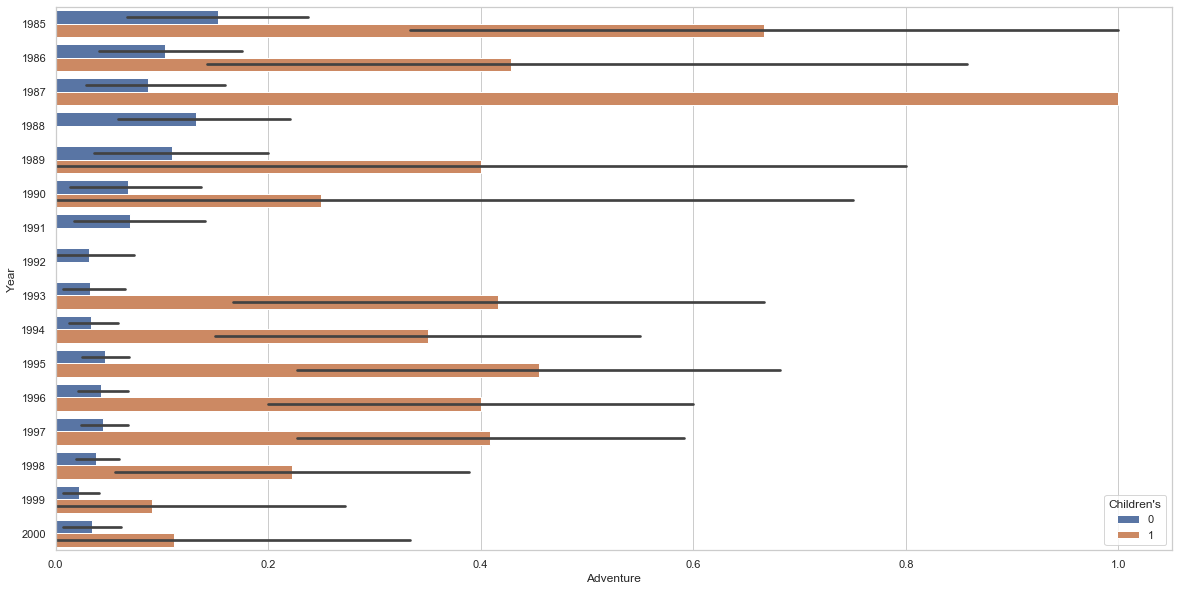

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x='Adventure', y='Year', hue='Children\'s', data=movies2, orient='h')
plt.show()
sns.set(style="darkgrid")

El gráfico muestra si las películas de aventuras son también para público infantil o no.La mayoría de ellas sí lo son.

In [41]:
#Podemos comprobar los resultados de la gráfica
movies.groupby(['Year','Children\'s'])['Adventure'].mean()[-32:]

Year  Children's
1985  0             0.152542
      1             0.666667
1986  0             0.103093
      1             0.428571
1987  0             0.086957
      1             1.000000
1988  0             0.132353
      1             0.000000
1989  0             0.109091
      1             0.400000
1990  0             0.068493
      1             0.250000
1991  0             0.070175
      1             0.000000
1992  0             0.031579
      1             0.000000
1993  0             0.032680
      1             0.416667
1994  0             0.033755
      1             0.350000
1995  0             0.046875
      1             0.454545
1996  0             0.043077
      1             0.400000
1997  0             0.044369
      1             0.409091
1998  0             0.037618
      1             0.222222
1999  0             0.022059
      1             0.090909
2000  0             0.034014
      1             0.111111
Name: Adventure, dtype: float64

In [42]:
#Información estadística
movies.describe()

,Year,Animation,Romance,Western,Comedy,Documentary,Drama,Crime,Mystery,Film-Noir,Action,Thriller,Horror,Sci-Fi,Musical,Children's,War,Adventure,Fantasy
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,1986.066959,0.027041,0.121298,0.017512,0.309039,0.032707,0.412825,0.054339,0.027298,0.011331,0.129539,0.126706,0.088334,0.071079,0.029359,0.064641,0.036827,0.072882,0.017512
std,16.895690,0.162224,0.326515,0.131187,0.462157,0.177891,0.492405,0.226715,0.162973,0.105858,0.335839,0.332686,0.283816,0.256990,0.168832,0.245923,0.188362,0.259976,0.131187
min,1919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1997.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Añadimos variables categóricas, en este caso solo Title
round(movies.describe(include='all'), 3)

,Title,Year,Animation,Romance,Western,Comedy,Documentary,Drama,Crime,Mystery,Film-Noir,Action,Thriller,Horror,Sci-Fi,Musical,Children's,War,Adventure,Fantasy
count,3883,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000
unique,3841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hamlet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1986.067,0.027,0.121,0.018,0.309,0.033,0.413,0.054,0.027,0.011,0.130,0.127,0.088,0.071,0.029,0.065,0.037,0.073,0.018
std,NaN,16.896,0.162,0.327,0.131,0.462,0.178,0.492,0.227,0.163,0.106,0.336,0.333,0.284,0.257,0.169,0.246,0.188,0.260,0.131
min,NaN,1919.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,NaN,1982.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,NaN,1994.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,NaN,1997.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [44]:
movies.isnull().sum()/len(movies)

Title          0.0
Year           0.0
Animation      0.0
Romance        0.0
Western        0.0
Comedy         0.0
Documentary    0.0
Drama          0.0
Crime          0.0
Mystery        0.0
Film-Noir      0.0
Action         0.0
Thriller       0.0
Horror         0.0
Sci-Fi         0.0
Musical        0.0
Children's     0.0
War            0.0
Adventure      0.0
Fantasy        0.0
dtype: float64

In [45]:
round((movies['Adventure']).describe(), 3)

count    3883.000
mean        0.073
std         0.260
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Adventure, dtype: float64

In [46]:
round(movies['Adventure'].median(),3)

0.0

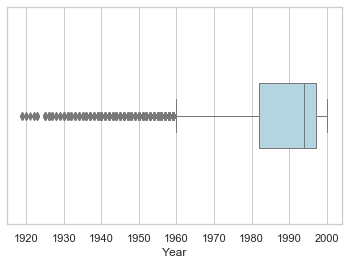

In [47]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = movies['Year'], color='lightblue', fliersize=5, linewidth=1, width=0.3)

Vemos que la concentración de películas está a partir de 1980. convirtiendo las películas de la primera mitad del siglo XX en outliers.

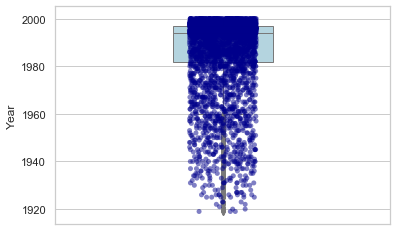

In [48]:
ax = sns.boxplot(y="Year", data=movies,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=movies["Year"], orient='v', color='darkblue', alpha= 0.5)

Uniedo las dos vistas vemos como la gran cantidad de películas se ubican  a partir de 1980 como comentamos en la celda anterior.

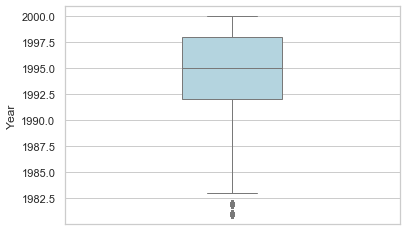

In [49]:
sns.boxplot(y="Year", data=movies[movies.Year > 1980],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

Si filtramos y solo nos fijamos a partir de la década de los 80 hacia adelante, vemos que la mediana está en Q2=1995,y que incluso tenemos algunos outliers en los primeros 80

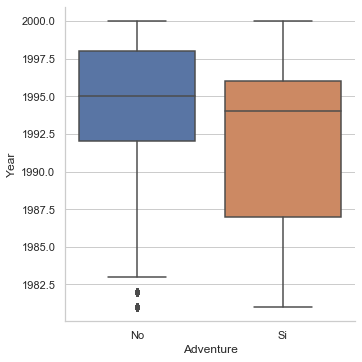

In [50]:
## añadimos variable categorica 'Adventure' en x:
ax = sns.catplot(x='Adventure', y='Year', kind='box',
                 data=movies[movies.Year >1980]);
ax.set_xticklabels(['No','Si'])
plt.show()

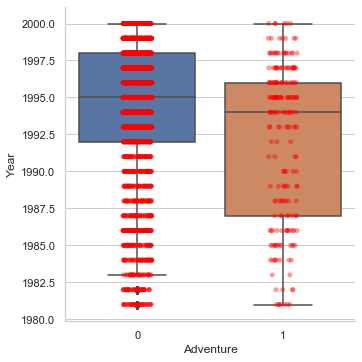

In [51]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='Adventure', y='Year', kind='box',
                 data=movies[movies.Year>1980]);
ax = sns.stripplot(x='Adventure', y='Year', data=movies[movies.Year > 1980], orient='v', color='red', alpha= 0.4);

Las dos últimas gráficas son muy parecidas, en la segunda le añadimos stripplot que nos pemite ver la distribución de los diferentes puntos y cómo coinciden con la información que nos dan los bloxplots. 
Son gráficas que hablan de películas posteriores a 1980, vemos que tienen una ditribución parecida con valores de cuartiles cercanos.

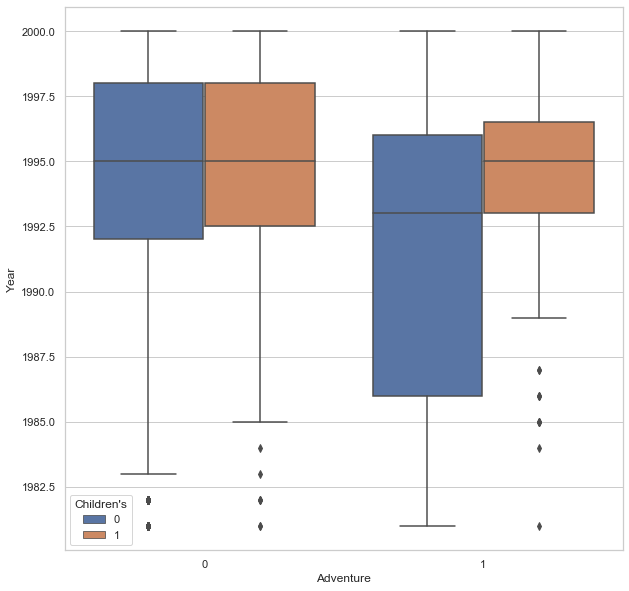

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Adventure', y='Year', hue='Children\'s', 
               data=movies[movies.Year > 1980])
ax.set_xticklabels(['No','Si'])
plt.show()

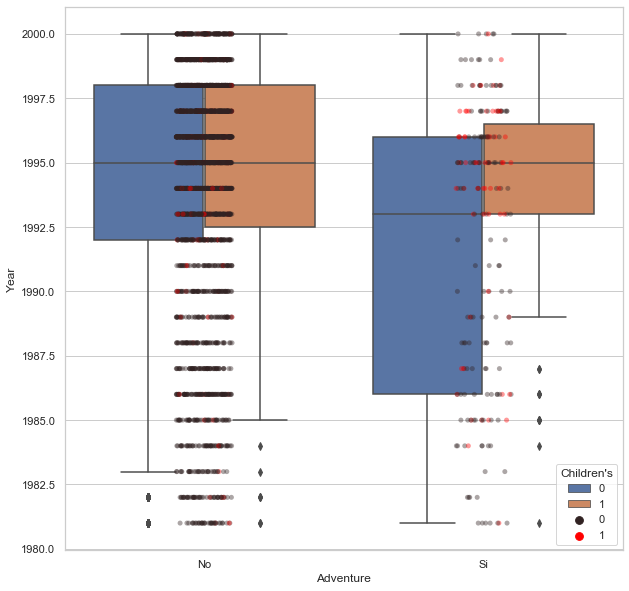

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Adventure', y='Year', hue='Children\'s', data=movies[movies.Year > 1980])
ax = sns.stripplot(x='Adventure', y='Year', hue='Children\'s', data=movies[movies.Year > 1980], orient='v', color='red', alpha= 0.4);
ax.set_xticklabels(['No','Si'])
plt.show()

Repetición del proceso anterior pero clasificando también por si son películas para niños o no

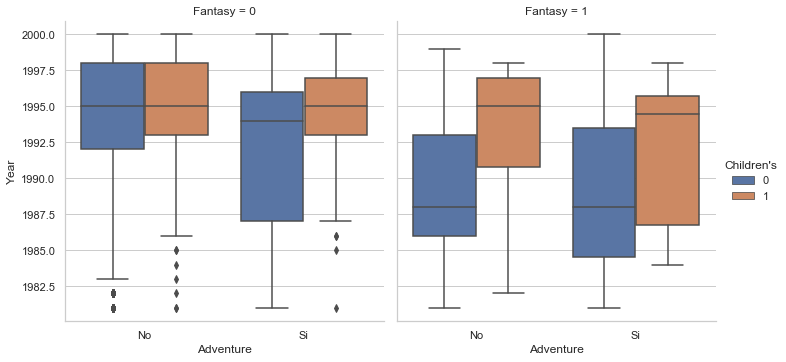

In [54]:
ax=sns.catplot(x='Adventure', y='Year', hue='Children\'s', col='Fantasy',
               kind='box', data=movies[movies.Year >1980])
ax.set_xticklabels(['No','Si'])
plt.show()

Por último hemos añadido otra variable categórica Fantasy, podemos hacer un análisis detallado para cada caso de los tres géneros y por año.

#### Exercici 3:
**Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.**

El fichero movies.dat forma parte de un dataset más amplio publicado por [Movielens](https://grouplens.org/datasets/movielens/), en concreto MovieLens 1M que está formado por el fichero anterior, un fichero con los ratings que los usuarios han dado a cada película y otro archivo, users, que contiene información del usuario (edad, género, profesión).
Vamos a recuperar el dataset para ofrecer más información de las películas:
1. Total películas por año y género, evolución temporal, reparto películas
2. Rating de películas por edades, género y ocupación
3. Películas más votadas por año usando Bokeh

In [55]:
#Leemos movies.dat con el campo MovieID que antes eliminamos para hacer joins con los dataframes ratings y users
with open('Desktop/DataScience/datasets/movies/movies.dat', 'r') as fp:
    data = fp.read().splitlines()
movies=pd.DataFrame(data)   
df1=df.iloc[:,0].str.extract(r'((?P<MovieID>\d*)::(?P<Title>.*)(?P<Year>\(\d{4}\))::(?P<Genre>[\w|\'-]*$))')
movies=df1.loc[:,['MovieID','Title','Year','Genre']]
movies['Year']=movies['Year'].str.lstrip('(').str.rstrip(')')
movies.head()

,MovieID,Title,Year,Genre
0,1,Toy Story,1995,Animation|Children's|Comedy
1,2,Jumanji,1995,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama
4,5,Father of the Bride Part II,1995,Comedy


In [56]:
#Extraeamos lista de Géneros
lista=[y for x in movies.Genre.values.flatten() for y in  re.split('[|]', x)]
lista=[*set(lista)]
lista[0:5]

['Animation', 'Romance', 'Western', 'Comedy', 'Documentary']

In [57]:
#si la película tiene n géneros guardamos cada género en una fila nueva
#por ejemplo para Toy Story que tiene 3 géneros, crearemos 1 fila para cada género
movies_processed=pd.DataFrame(columns=list(movies))
for i in range(len(movies)):
    for j in lista:
        if j in movies.loc[i,'Genre']:
            movies_processed=movies_processed.append(movies.loc[i,:])
            movies_processed.iloc[-1,3]=j  

In [58]:
#Reseteamos índice
movies_processed.index=[*range(len(movies_processed))]
movies_processed.head()

,MovieID,Title,Year,Genre
0,1,Toy Story,1995,Animation
1,1,Toy Story,1995,Comedy
2,1,Toy Story,1995,Children's
3,2,Jumanji,1995,Children's
4,2,Jumanji,1995,Adventure


**Total de películas por año**

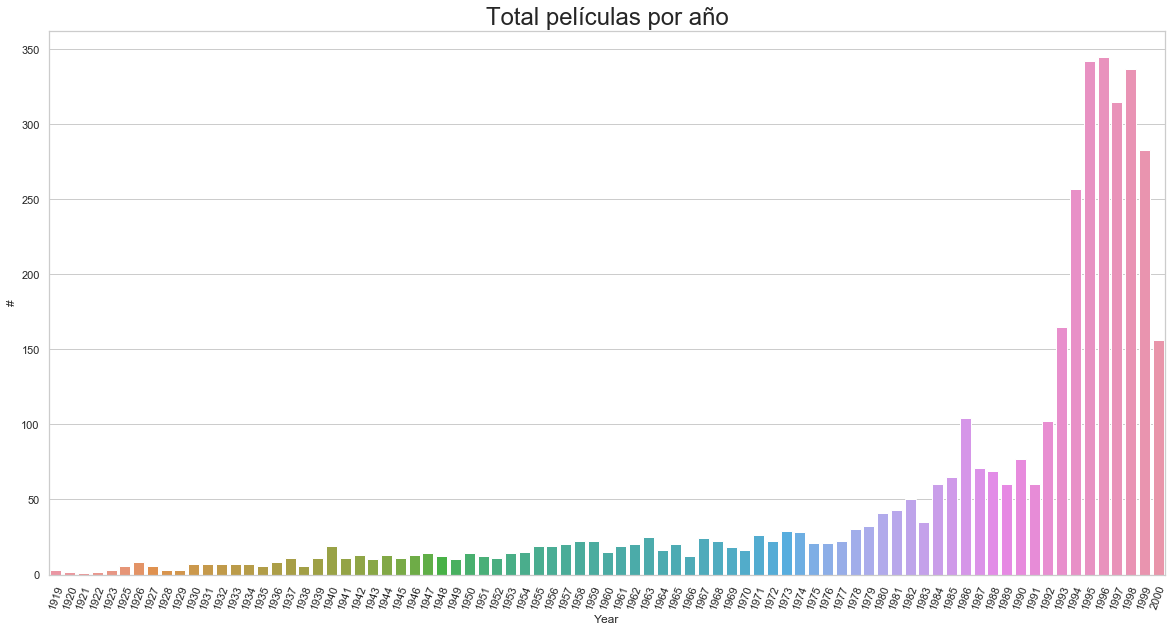

In [59]:
plt.figure(figsize=(20,10))
movies.Year=movies.Year.astype('int32')
sns.countplot(x=movies.Year)
plt.title('Total películas por año',size=24)
plt.ylabel('#')
plt.xticks(rotation=70)
plt.show()

El aumento de películas es muy lento desde el comienzo del siglo XX hasta 1980, a partir de ese año hay un crecimiento exponencial en la producción hasta llegar al máximo en 1996. Después, durante los años posteriores, hay también un descenso muy rápido.

**Total de películas por género y año**

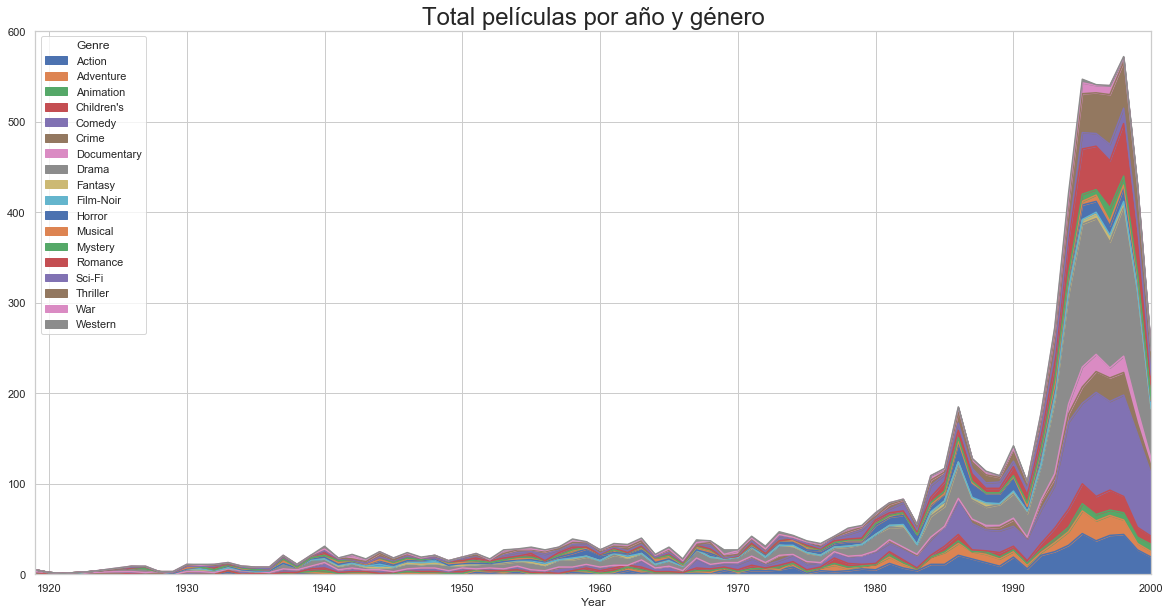

In [60]:
movies_processed.Year=movies_processed.Year.astype('int32')
pd.crosstab(movies_processed['Year'],movies_processed['Genre']).plot.area(figsize=(20,10))
plt.title('Total películas por año y género',size=24)
plt.show()

**Evolución temporal por género**

Podemos cambiar el valor de genre para ver la evolución de cada género en el tiempo

In [61]:
lista

['Animation',
 'Romance',
 'Western',
 'Comedy',
 'Documentary',
 'Drama',
 'Crime',
 'Mystery',
 'Film-Noir',
 'Action',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Musical',
 "Children's",
 'War',
 'Adventure',
 'Fantasy']

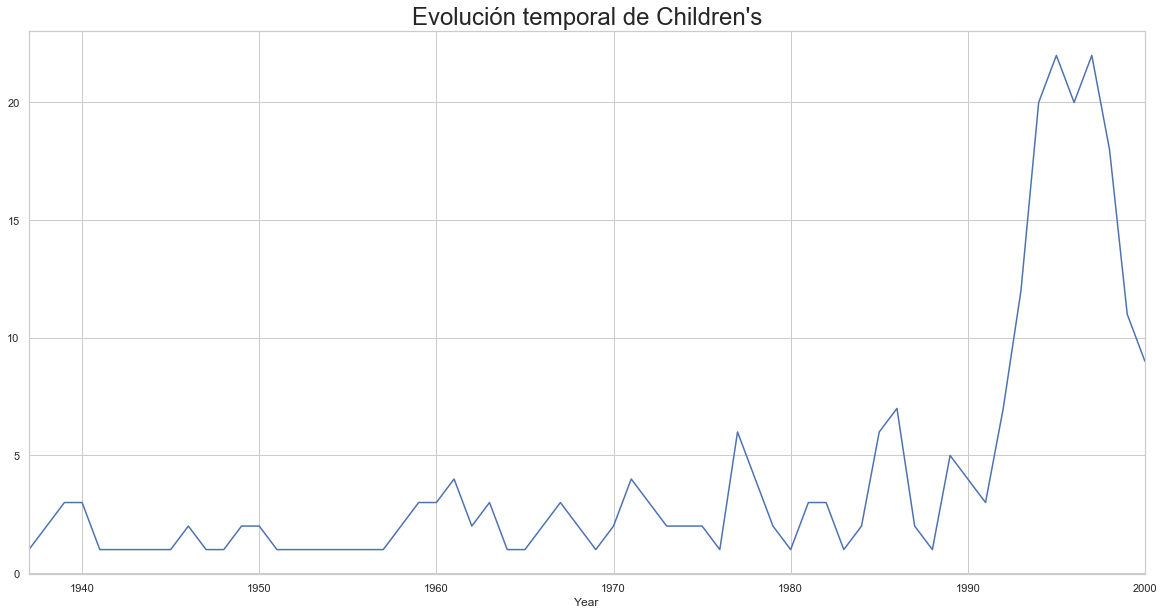

In [62]:
genre='Children\'s'

x=movies_processed.loc[movies_processed['Genre']==genre,:]
x.groupby('Year')['Title'].count().plot.line(figsize=(20,10))
plt.title('Evolución temporal de %s'%genre,size=24)
plt.show()

**Reparto películas por género**

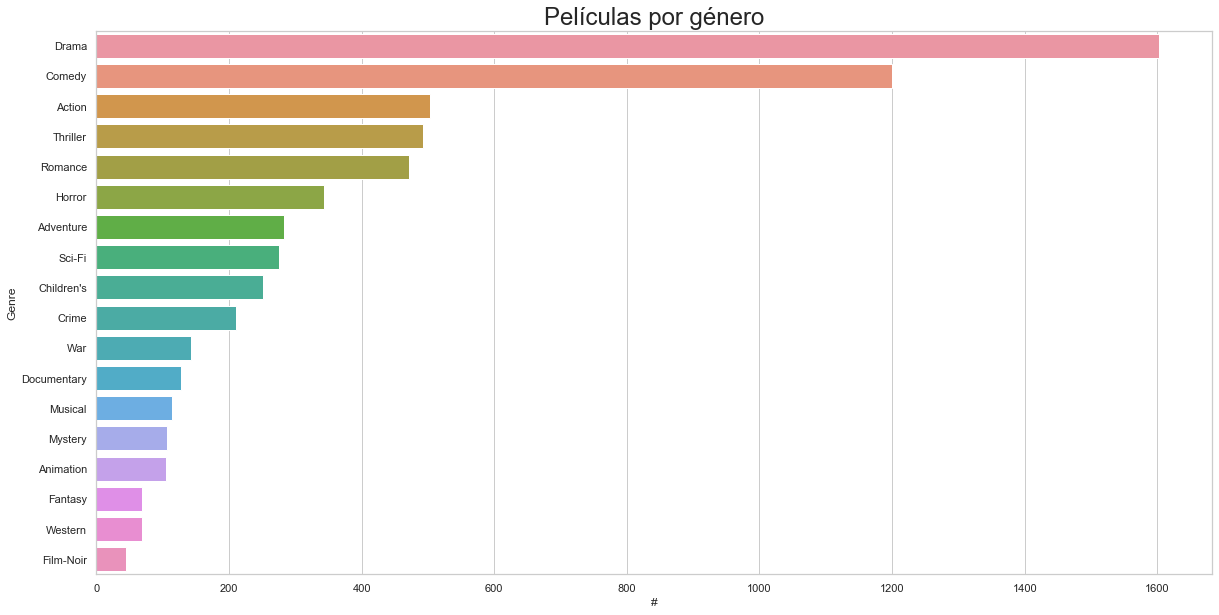

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(y=movies_processed.Genre, order=movies_processed.Genre.value_counts().index)
plt.xlabel('#')
plt.title('Películas por género',size=24)
plt.show()

El drama y la comedia son los grandes dominadores tanto a nivel general como por año. A partir de 1980, con el aumento de producciones también crecen varios géneros:Thriller, romance, infantiles, etc.

In [64]:
# Leemos ratings de MovieLens
#UserID::MovieID::Rating::Timestamp
with open('Desktop/DataScience/datasets/movielens/ml-1m/ratings.dat', 'r') as fp:
    data = fp.read().splitlines()
ratings=pd.DataFrame(data)
split=ratings[0].str.split("::")
ratings['UserID'],ratings['MovieID'],ratings['Rating']=split.str[0],split.str[1],split.str[2]
ratings=ratings.iloc[:,1:]
ratings.head()

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [65]:
#Leemos users de MovieLens
#UserID::Gender::Age::Occupation::Zip-code
with open('Desktop/DataScience/datasets/movielens/ml-1m/users.dat', 'r') as fp:
    data = fp.read().splitlines()
users=pd.DataFrame(data)
split=users[0].str.split("::")
users['UserID'],users['Gender'],users['Age'],users['Occupation']=split.str[0],split.str[1],split.str[2],split.str[3]
users=users.iloc[:,1:]
users.head()

,UserID,Gender,Age,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20


In [66]:
#Unimos users y ratings (relación 1:1) en ratings
ratings=pd.merge(ratings,users, on=['UserID'])
ratings.head()

,UserID,MovieID,Rating,Gender,Age,Occupation
0,1,1193,5,F,1,10
1,1,661,3,F,1,10
2,1,914,3,F,1,10
3,1,3408,4,F,1,10
4,1,2355,5,F,1,10


**Cambiando el valor de movieID podemos ver la puntuación media de una película según la edad, la ocupación o el género del usuario. Ratings de 0 a 5**

**Rating de películas por edades**

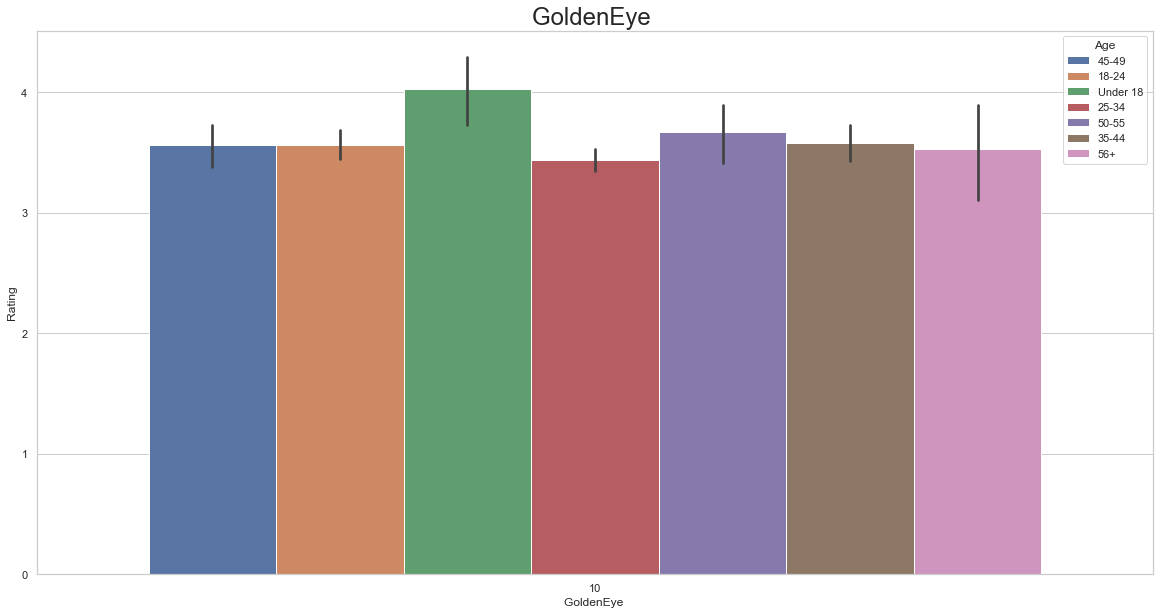

In [67]:
movieID='10' #10 es Goldeneye, podemos cambiar el movieID para consultar otra película

data=ratings.copy()
data.Rating=data.Rating.astype('int32')
ageLabels={'1':"Under 18",'18':"18-24",'25':"25-34",'35':"35-44",'45':"45-49",'50':"50-55",'56':"56+"}
data.Age=data.Age.map(ageLabels)
plt.figure(figsize=(20,10))
ax=sns.barplot(x='MovieID',y='Rating',data=data.loc[data['MovieID']==movieID,:],hue='Age') 
ax.set_xlabel(movies.loc[movies['MovieID']==movieID,'Title'].values[0])
plt.title(movies.loc[movies['MovieID']==movieID,'Title'].values[0],size=24)
plt.show()

El grupo de edad que mejor puntuación le da a Goldeneye son los menores de 18. El resto de grupos le dan una nota similar.

**Rating de películas por género**

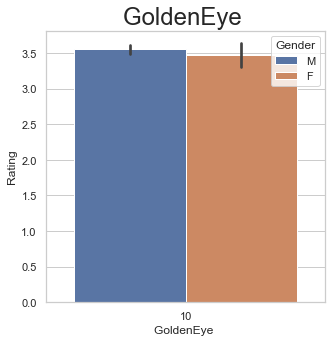

In [68]:
movieID='10'

data=ratings.copy()
data.Rating=data.Rating.astype('int32')
plt.figure(figsize=(5,5))
ax=sns.barplot(x='MovieID',y='Rating',data=data.loc[data['MovieID']==movieID,:],hue='Gender') 
ax.set_xlabel(movies.loc[movies['MovieID']==movieID,'Title'].values[0])
plt.title(movies.loc[movies['MovieID']==movieID,'Title'].values[0],size=24)
plt.show()

No hay casi diferencias entre sexos a la hora de puntuar una película.

**Rating de película por ocupación**

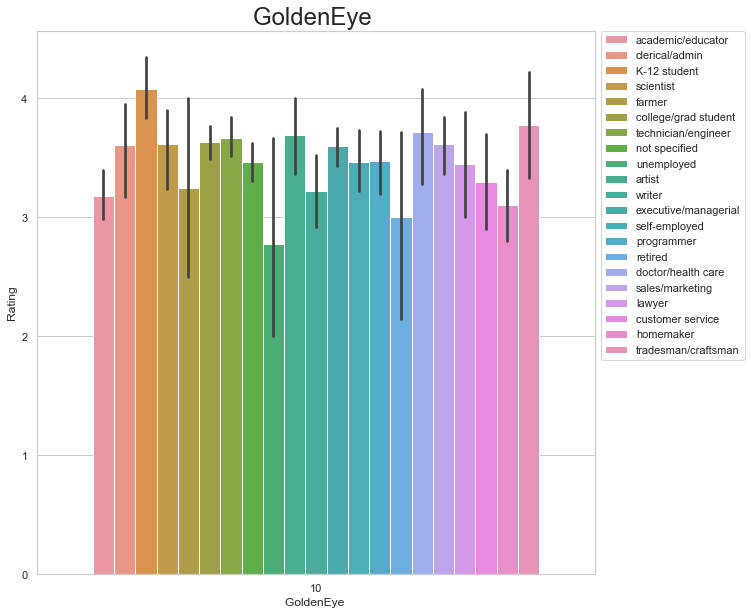

In [69]:
movieID='10'

data=ratings.copy()
data.Rating=data.Rating.astype('int32')
occupationLabels={'0':"not specified",'1':"academic/educator",'2':"artist",'3':"clerical/admin",'4':"college/grad student",'5':"customer service",
        '6':"doctor/health care",'7':"executive/managerial",'8':"farmer",'9':"homemaker",'10':"K-12 student",'11':"lawyer",'12':"programmer",
        '13':"retired",'14':"sales/marketing",'15':"scientist",'16':"self-employed",'17':"technician/engineer",'18':"tradesman/craftsman",
        '19':"unemployed",'20':"writer"}
data['Occupation'] = data['Occupation'].map(occupationLabels)
plt.figure(figsize=(10,10))
ax=sns.barplot(x='MovieID',y='Rating',data=data.loc[data['MovieID']==movieID,:],hue='Occupation')
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.set_xlabel(movies.loc[movies['MovieID']==movieID,'Title'].values[0])
plt.title(movies.loc[movies['MovieID']==movieID,'Title'].values[0],size=24)
plt.show()

Los que mejor la puntúan son los estudiantes de secundaria (K-12) y los que peor los desempleados

**Películas más votadas por año**

Usaremos la librería Bokeh que permite visualizaciones interactivas, seleccionando un recuadro del gráfico podemos hacer zoom del mismo o poniéndonos con el cursor sobre uno de los datos veremos información del mismo (título película, año,..)

In [70]:
#Creamos un dataframe movies2 con el rating medio  y el número de votos de cada película
ratings['Rating']=ratings['Rating'].astype('int64')
moviesRating=ratings.groupby('MovieID')['Rating'].mean().reset_index().rename(columns={'Rating':'Rating_mean'})
moviesVote=ratings.groupby(['MovieID'],as_index=False)['UserID'].count().rename(columns={'UserID':'Total_votes'})
#join moviesRating y moviesVote
df_join1=pd.merge(moviesRating,moviesVote, on='MovieID')
#join df_join1 con movies
movies2=pd.merge(movies,df_join1, on=['MovieID'])
movies2['Genre']=movies2['Genre'].str.split('|').str[0]
movies2.head()

,MovieID,Title,Year,Genre,Rating_mean,Total_votes
0,1,Toy Story,1995,Animation,4.146846,2077
1,2,Jumanji,1995,Adventure,3.201141,701
2,3,Grumpier Old Men,1995,Comedy,3.016736,478
3,4,Waiting to Exhale,1995,Comedy,2.729412,170
4,5,Father of the Bride Part II,1995,Comedy,3.006757,296


In [71]:
#A partir de movies2 extraemos la película con más votos por año
df=pd.DataFrame(columns=list(movies2))
years=np.sort(movies2.Year.unique()).tolist()
for i in years:
    a=movies2.loc[movies2['Year']==i,:].sort_values('Total_votes',ascending=False).iloc[0,:]
    df=df.append(a,ignore_index=True)
df.head()

,MovieID,Title,Year,Genre,Rating_mean,Total_votes
0,3132,Daddy Long Legs,1919,Comedy,3.631579,38
1,3309,"Dog's Life, A",1920,Comedy,3.666667,24
2,3310,"Kid, The",1921,Action,3.790323,62
3,1348,"Nosferatu (Nosferatu, eine Symphonie des Graue...",1922,Horror,3.991597,238
4,3140,"Three Ages, The",1923,Comedy,3.444444,9


In [72]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook

output_notebook()

Loading BokehJS ...

In [73]:
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Category20
#Vamos a segmentarla por género, cada color un género diferente
genres_list=lista
# Make a color mapper: color_mapper
color_mapper = CategoricalColorMapper(factors=genres_list, palette=Category20[20])

In [74]:
from bokeh.models import HoverTool
tools = "box_zoom, undo"
source = ColumnDataSource(df)
p = figure(tools=tools)
p.add_tools(HoverTool(tooltips=[['Title', '@Title'],['Year','@Year'],['Genre','@Genre'],['Rating','@Rating_mean']]))
p.circle('Year','Total_votes',source=source, size=20, alpha=0.5,color=dict(field='Genre', transform=color_mapper))
p.title.text='Películas más votados por año'
show(p)

Poniendo el cursor sobre los puntos veremos el título, año, rating y género de la película más votada ese año.

**Adjunto imagen del gráfico porque no se visualiza en github**

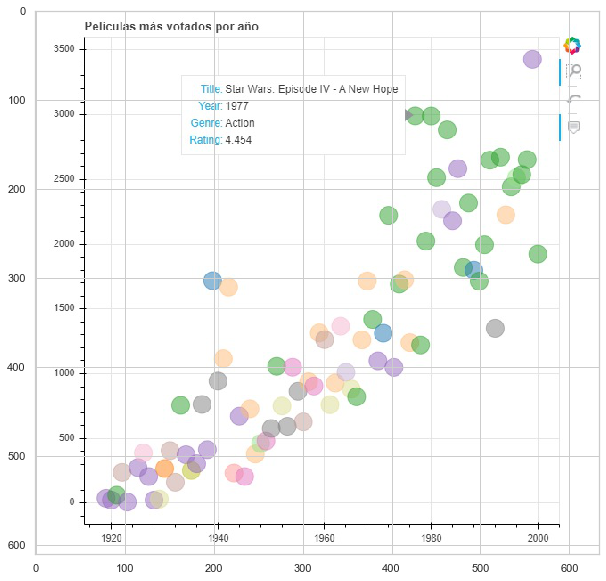

In [75]:
from PIL import Image
plt.figure(figsize=(15,10))
pil_im = Image.open('bokeh.jpg', 'r')
plt.imshow(pil_im)
plt.show()